<a href="https://colab.research.google.com/github/SaiMajeti/Big-Data-Projects/blob/main/Majeti_CS_620_DataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sai Hymavathi Majeti
Email : smaje002@odu.edu

Web Portfolio Link: cs.odu.edu/~smajet

## **Project - Abstract**

### Title of the Dataset:
Book-crossing: User review ratings dataset

### Data Source - URL: 
https://www.kaggle.com/ruchi798/bookcrossing-dataset

### Brief Description: 
This dataset contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. The data source is anynomous too. However, the collection of this data is fairly huge and interesting.  






### End Goal: 
My end goal with this data set is to create a book recommendation system for the readers based on various attributes (mainly based on the content, author, age or the genre) of a book. 

Also, I would like to analyse and find the correlation between various attributes, as well as, create visualizations along the way during the whole process. 


### Importing required packages:

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import sklearn

from scipy.sparse import csr_matrix
from PIL import Image as im
from IPython.core.display import Image
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.express as px
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,12)

pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Primary dataset:
**BX-Book-ratings.csv** and it has the following attributes;

#### <ins>Number of Columns</ins>: 1149781
#### <ins>Number of Rows</ins>: 3

***User-ID*** - Reader ID. Used an ID number to keep the reader's identity anonymous.

***ISBN*** - ISBN (unique number) of the book
 
***Book-rating*** - rating the book got

### Head of this dataset is below:


In [ ]:
#ratings
path = "/content/drive/My Drive/Dataset-620/BX-Book-Ratings.csv"
r_cols = ['user_id', 'isbn', 'book_rating']
ratings = pd.read_csv(path, sep=';', names =r_cols, encoding='latin-1',low_memory=False)
ratings = ratings.drop(ratings.index[0])
ratings.head(3)

,user_id,isbn,book_rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0


### Secondary dataset:

**BX-Books.csv** and it has the following attributes;

#### <ins>Number of Columns</ins>: 271380
#### <ins>Number of Rows</ins>: 8

***isbn*** - ISBN (unique number) of the book

**book_title** - title of the book

**book_author** - the author of the book

**year_of_publication** - year in which the book was published

**publisher** - the company which published the book

**Image-URL-S** - Image URL - Small

**Image-URL-M** - Image URL - Medium

**Image-URL-L** - Image URL - Large

### Head of this dataset is below:




In [ ]:
# glance at the dataset
path2 = '/content/drive/My Drive/Dataset-620/BX-Books.csv'
#Books

i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
books = pd.read_csv(path2, sep=';', names=i_cols, encoding='latin-1',low_memory=False)
books = books.drop(books.index[0])
books.head(3)



,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


### Third dataset:

**BX-Users.csv** and it has the following attributes;

#### <ins>Number of Columns</ins>: 278859
#### <ins>Number of Rows</ins>: 3

***user-id*** - Reader ID. Used an ID number to keep the reader's identity anonymous.

**location** - Location of the reader

**age** - Age of the reader 

### Head of this dataset is below:

In [ ]:
# glance at the dataset

path3 = '/content/drive/My Drive/Dataset-620/BX-Users.csv'
#Users
u_cols =['user_id', 'location', 'age']
users = pd.read_csv(path3, sep=';', names = u_cols, encoding='latin-1', low_memory=False)
users.head(3)




,user_id,location,age
0,User-ID,Location,Age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18


<ins> Overall, the 3 datasets I will be using: </ins>

**ratings:** user-id, isbn, book-rating

**users:** user-id, location, age

**items:** ISBN, book_title, book_author, year-of-publication, publisher

Dropping the **images** columns in the dataset#2 - items. 

In [ ]:
books = books.drop(columns=['img_s', 'img_m', 'img_l'], axis = 1)

books.head(3)

,isbn,book_title,book_author,year_of_publication,publisher
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


### Merging the datasets:

In [ ]:
#merging the datasets - ratings and books on ISBN 

book_ratings = pd.merge(books, ratings, on = 'isbn')

# merging book_ratings and users (details)
book_rating_user = pd.merge(book_ratings, users, on = 'user_id')
book_rating_user.head(3)

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",NaN


### Exploring the dataset:

- Looking at the number of null values in the dataset

In [ ]:
print("with null - shape:" + str(book_rating_user.shape))
#(rows, columns)

#without null values
bru_noNull = book_rating_user.dropna(how = 'any')
print("without null - shape:" + str(bru_noNull.shape))

# total null values in the dataframe
print(book_rating_user.isnull().sum().sum(),'\n')


with null - shape:(1031175, 9)
without null - shape:(753327, 9)
277848 



Looking at the number of null values in each column 

In [ ]:
#number of NAs in each column
book_rating_user.isna().sum()

isbn                        0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   2
user_id                     0
book_rating                 0
location                    0
age                    277845
dtype: int64

In [ ]:
#splitting the location column into city, state, country 

location = book_rating_user.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

book_rating_user['city'] = location['city']
book_rating_user['state'] = location['state']
book_rating_user['country'] = location['country']

book_rating_user  = book_rating_user.drop(columns = ['location'], axis = 1)
book_rating_user.head(3)

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,NaN,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,NaN,timmins,ontario,canada


In [ ]:
# null values after splitting the location column
book_rating_user.isna().sum()

isbn                        0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   2
user_id                     0
book_rating                 0
age                    277845
city                        0
state                       0
country                 24197
dtype: int64

In [ ]:
#datatypes of each column.
book_rating_user.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
user_id                object
book_rating            object
age                    object
city                   object
state                  object
country                object
dtype: object

In [ ]:
# dropping null values and subsetting into a different one.
bru_noNull = book_rating_user.dropna(how='any')
bru_noNull[bru_noNull['age'].isnull()]
bru_noNull[bru_noNull['publisher'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country


#### Dealing with null values

- Null values from all the columns were removed and replaced with 0s for the easier usage of the dataset.
- From here, bru_noNull (since it doesn't have null values) will be used for further exploration. 
- Whenever we need to consider null values we can go back to the original one book_rating_user.

In [ ]:
#changing the data types of the numeric columns
bru_noNull['age'] = bru_noNull['age'].astype(int)
bru_noNull['user_id'] = bru_noNull['user_id'].astype(int)
bru_noNull['book_rating'] = bru_noNull['book_rating'].astype(int)

#overall info about the dataset
bru_noNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742692 entries, 0 to 1031173
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 742692 non-null  object
 1   book_title           742692 non-null  object
 2   book_author          742692 non-null  object
 3   year_of_publication  742692 non-null  object
 4   publisher            742692 non-null  object
 5   user_id              742692 non-null  int64 
 6   book_rating          742692 non-null  int64 
 7   age                  742692 non-null  int64 
 8   city                 742692 non-null  object
 9   state                742692 non-null  object
 10  country              742692 non-null  object
dtypes: int64(3), object(8)
memory usage: 68.0+ MB


### Cleaning the dataset by each column:

There are multiple errors with this dataset
- columns that should have only string values have numerical values
- columns that should have only numerical values have string value
- In the following steps, each column will be explored and cleaned to fit its datatype

#### age

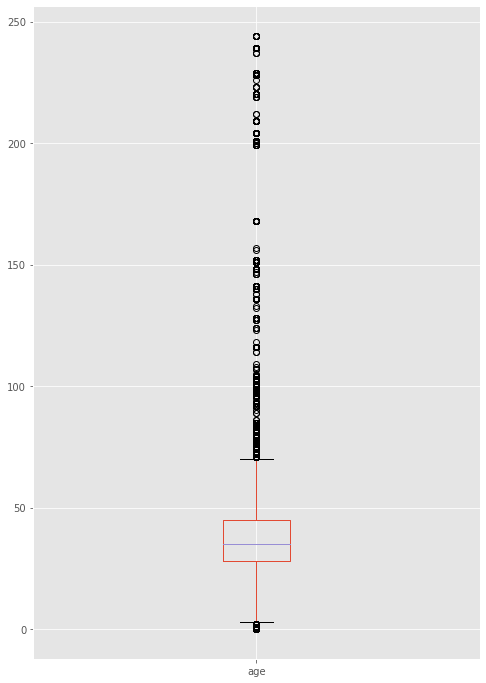

In [ ]:
# let us see if there are any outliers in the numerical columns - 1) book rating and 2) age.

# boxplot for age
bru_noNull.boxplot(column=['age'])

Looks like there are lot of Outliers - values that are higher than 100 years which are rarely-possible and impossible values.



In [ ]:
#set of all values in the age column
bru_noNull.age.unique()

array([ 18,  49,  30,  36,  29,  60,  27,  71,  40,  53,  65,  46,  47,
        26,  56,  37,  39,  25,  31,  41,  20,  58,  42,  38,  52,  21,
        22,  34,  33,  19,  57,  51,  48,  35,  32,  62,  45,  74,  44,
        43,  68,  54,  55,  24,  59,  28,  70,  17,  23,  14,  50,  16,
        61,  15,  66, 116,  84,  82,   9,  72,  81,  67,  64,  13,  75,
        76, 128,  69,  73, 104,  63,   0,  77,  79,   7, 239, 103,  12,
       201, 204,  80,   2,  85,   3,   4,  78,   1,  83, 151,   8, 100,
       148,  93,  11, 209,  10, 147, 101, 168, 152, 133,  97,   5, 136,
        86,  99,  92, 228, 141, 237,  96, 146, 140, 223, 219, 124,  94,
       200, 220, 244, 212, 157, 229, 105,   6, 199, 226, 123, 118, 127,
       114, 156, 138,  90, 109,  89,  95, 108, 132, 107,  98])

In [ ]:
#subsetting the outliers in the age column
ages =bru_noNull[bru_noNull['age']>100]

ages.shape

ages.age.unique()

array([116, 128, 104, 239, 103, 201, 204, 151, 148, 209, 147, 101, 168,
       152, 133, 136, 228, 141, 237, 146, 140, 223, 219, 124, 200, 220,
       244, 212, 157, 229, 105, 199, 226, 123, 118, 127, 114, 156, 138,
       109, 108, 132, 107])

Aboe is the subset of outlier values in the age column.
- These might be the wrongly typed values 
because it is taken from the 3rd dataset which has only user-id, location and age and there is no possibility that these values belong to other columns.
- Changing these values either to 0 since every other unnecessary values like NaNs have been changed to 0s.

In [ ]:
#changing age values greater than 110 to 0
bru_noNull.loc[bru_noNull['age'] > 110, 'age'] = 0

In [ ]:
bru_noNull.loc[bru_noNull['age'] < 12, 'age'].unique()

array([ 0,  9,  7,  2,  3,  4,  1,  8, 11, 10,  5,  6])

In [ ]:
#having cut off age as 12 for the user's age to be able to have reliable reviews.
#changing age values less than 12 to 0
bru_noNull.loc[bru_noNull['age'] < 12, 'age'] = 0

In [ ]:
bru_noNull.age.unique()

array([ 18,  49,  30,  36,  29,  60,  27,  71,  40,  53,  65,  46,  47,
        26,  56,  37,  39,  25,  31,  41,  20,  58,  42,  38,  52,  21,
        22,  34,  33,  19,  57,  51,  48,  35,  32,  62,  45,  74,  44,
        43,  68,  54,  55,  24,  59,  28,  70,  17,  23,  14,  50,  16,
        61,  15,  66,   0,  84,  82,  72,  81,  67,  64,  13,  75,  76,
        69,  73, 104,  63,  77,  79, 103,  12,  80,  85,  78,  83, 100,
        93, 101,  97,  86,  99,  92,  96,  94, 105,  90, 109,  89,  95,
       108, 107,  98])

Now, there are only ages between 12 - 110. 

(just considered the possible maximum cutoff for the age, hence 110)

In [ ]:
#no null values for now
bru_noNull.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_id                0
book_rating            0
age                    0
city                   0
state                  0
country                0
dtype: int64

#### book rating

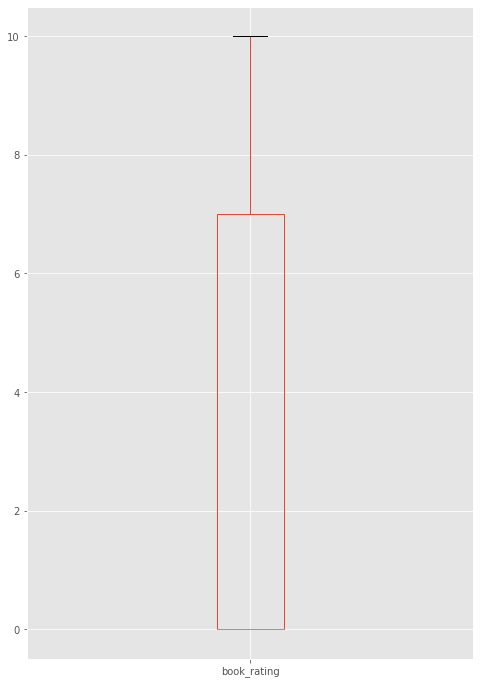

In [ ]:
#checking outliers in the book ratings
bru_noNull.boxplot(column=['book_rating'])

#there are no outliers and all the rating values are in the range 0 - 10 as expected.

In [ ]:
#bru_noNull['year_of_publication'] = bru_noNull['year_of_publication'].astype(int)
#bru_noNull.boxplot(column=['year_of_publication'])

#raises error 

bru_noNull.year_of_publication.unique()


array(['2002', '2001', '2003', '1998', '1993', '1999', '1992', '2000',
       '1989', '1996', '1988', '1976', '1985', '1991', '1980', '2004',
       '1995', '1997', '1994', '0', '1986', '1990', '1987', '1984',
       '1983', '1938', '1974', '1981', '1951', '1977', '1975', '1925',
       '1971', '1970', '1973', '1967', '1982', '1969', '1979', '1963',
       '1953', '1978', '1956', '1964', '1965', '1972', '1901', '2030',
       '1927', '1923', '1954', '1958', '1955', '1966', '1926', '1968',
       '1961', '1940', '1959', '1941', '1942', '1962', '1922', '1957',
       '1897', '1960', '1949', 'Isadora Duncan', '1939', '1952', '1933',
       '1944', '1948', '2011', '1902', '1920', '1950', '1930', '1911',
       '1943', '1947', '1945', '2005', '1946', '1937', '1932', '1924',
       '1921', '2038', '2021', '1900', '2026', '2050', '1929', '2020',
       'Frank Muir', '1936', 'ROBERT A. WILSON', 'Stan Berenstain',
       'George H. Scherr', 'Francine Pascal', '2006', 'Gallimard',
       'Salvad

We can see that there are lot of wrongly entered values in the year column. They seem to be the values from the author columns.

In [ ]:
#lets check if there are any wrong entries in other columns as well.
bru_noNull.head(3)


,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
18,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0,49,ottawa,ontario,canada
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,49,ottawa,ontario,canada


Since all the other values seem to be non-unique ones, let us check if there are any misentries. Like strings in num columns and numbers in string columns.

#### Book Title

In [ ]:
lists = bru_noNull[bru_noNull['book_title'].str.isnumeric()]
lists.book_title.unique()

#all the following are the book titles


array(['1939', '1984', '2001', '666', '1876', '1812', '253', '1916',
       '1633', '1492', '2024', '13', '1988', '27', '1968', '300', '45',
       '44', '50', '1929', '1700'], dtype=object)

In [ ]:
lists[lists['book_title'] == '666']
#can be verified in this way for each number if desired to double check 


,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
84587,0671831267,666,Jay Anson,1982,Pocket Books,123981,0,46,phoenix,arizona,usa
119390,0671831267,666,Jay Anson,1982,Pocket Books,224764,0,0,rockaway,new jersey,usa
177530,0671831267,666,Jay Anson,1982,Pocket Books,175003,0,33,round rock,texas,usa
581280,0671251449,666,Jay Anson,1981,Simon &amp; Schuster,177180,0,39,akron,ohio,usa
780688,0671251449,666,Jay Anson,1981,Simon &amp; Schuster,91100,0,33,upper marlboro,maryland,usa
1027392,0671831267,666,Jay Anson,1982,Pocket Books,50796,5,27,laporte,indiana,usa


In [ ]:
#checking book_author column
lists = bru_noNull[bru_noNull['book_author'].str.isnumeric()]
lists.book_title.unique()


array(['Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"',
       'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'],
      dtype=object)

In [ ]:
lists

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
287507,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,137190,0,31,rennes,bretagne,france
352373,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,227771,7,19,savion,n/a,israel


We can see that the values of book_title, book_author, year_of_publication, publisher are all misplaced.  

In [ ]:
lists.publisher.unique()

array(['http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'],
      dtype=object)

####book author

In [ ]:
bru_noNull = bru_noNull.replace({'publisher': {'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg': 'Gallimard', 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg': 'DK Publishing Inc.'}})
bru_noNull = bru_noNull.replace({'year_of_publication': {'Gallimard':'2003','DK Publishing Inc': '2000'}})
bru_noNull = bru_noNull.replace({'book_author': {'2003':'Jean-Marie Gustave Le Clézio','2000': 'Michael Teitelbaum'}})
bru_noNull = bru_noNull.replace({'book_title': {'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"':'Peuple du ciel suivi de les bergers','DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"': 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'}})

lists = bru_noNull[bru_noNull['book_author'].str.isnumeric()]
lists

#cleaned the book_author column with no more numerical values in it


,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country


#### year of publication

In [ ]:
#fix the year_of_publication column

#check the publisher column
bru_noNull.year_of_publication.unique()

lists = bru_noNull[pd.to_numeric(bru_noNull['year_of_publication'], errors='coerce').isnull()]

lists.head(3)

#lot of misentries in this subset df 

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
17841,0394720784,"\Your Isadora\"": The love story of Isadora Dun...","Gordon Craig""",Isadora Duncan,1976,36836,0,56,raleigh,north carolina,usa
213987,0413326608,"Upon my word!: More stories from \My word!\"" a...","Tony Shryane""",Frank Muir,1974,28204,0,61,south ohio,nova scotia,canada
236474,0440500702,Schrodinger's Cat Trilogy : \The Universe Next...,"\""The Homing Pigeons\""""",ROBERT A. WILSON,1988,56399,10,63,n/a,surrey,united kingdom


Here, 
- using to numeric method might delete useful information from the dataset by changing them to NAs

- replacing won't work here since it might replace accurate values along with inaccurate ones.

- cleaning it one by one column as there are not many, so go by each isbn
 


In [ ]:
bru_noNull.loc[(bru_noNull.isbn == '0394720784'),['book_author', 'year_of_publication', 'publisher']] = ['Gordon Craig and Isadora Duncan', '1976', 'other']
bru_noNull.loc[(bru_noNull.isbn == '0413326608'),['book_author', 'year_of_publication', 'publisher']] = ['Tony Shryane and Frank Muir', '1974', 'other']
bru_noNull.loc[(bru_noNull.isbn == '0440500702'),['book_author', 'year_of_publication', 'publisher']] = ['Robert A. Wilson', '1988', 'other']
bru_noNull.loc[(bru_noNull.isbn == '039482492X'),['book_author', 'year_of_publication', 'publisher']] = ['Stan Berenstain', '1972', 'other']
bru_noNull.loc[(bru_noNull.isbn == '0894805959'),['book_author', 'year_of_publication', 'publisher']] = ['George H. Scherr', '1989', 'other']
bru_noNull.loc[(bru_noNull.isbn == '0553570722'),['book_author', 'year_of_publication', 'publisher']] = ['Francine Pascal', '1997', 'other']
bru_noNull.loc[(bru_noNull.isbn == '8423920143'),['book_author', 'year_of_publication', 'publisher']] = ['Salvador de Madaraiga', '1976', 'other']
bru_noNull.loc[(bru_noNull.isbn == '1581801653'),['book_author', 'year_of_publication', 'publisher']] = ['Bart Rulon', '2002', 'other']
bru_noNull.loc[(bru_noNull.isbn == '006263545X'),['book_author', 'year_of_publication', 'publisher']] = ['Alan Rich', '1995', 'other']
bru_noNull.loc[(bru_noNull.isbn == '1874100055'),['book_author', 'year_of_publication', 'publisher']] = ['Jules Janin', '0' , 'other']
bru_noNull.loc[(bru_noNull.isbn == '0735201994'),['book_author', 'year_of_publication', 'publisher']] = ['John Peterman', '2000', 'other']
bru_noNull.loc[(bru_noNull.isbn == '0330482750'),['book_author', 'year_of_publication', 'publisher']] = ['Amit Chaudhuri', '0', 'other']
bru_noNull.loc[(bru_noNull.isbn == '034050823X'),['book_author', 'year_of_publication', 'publisher']] = ['K.C. Constantine', '1990', 'other']
bru_noNull.loc[(bru_noNull.isbn == '0373166982'),['book_author', 'year_of_publication', 'publisher']] = ['Karen T. Whittenburg', '1997', 'other']
bru_noNull.loc[(bru_noNull.isbn == '096401811X'),['book_author', 'year_of_publication', 'publisher']] = ['Luella Hill', '1998', 'other']

In [ ]:
bru_noNull['year_of_publication'] = bru_noNull['year_of_publication'].astype(int,  errors='ignore')


In [ ]:
#bru_noNull.boxplot(column=['year_of_publication'])
# not very informative, so try another viz.

#verify columns with years less than 1800 and remove greater than 2011 as well.

(bru_noNull[bru_noNull.year_of_publication.between(1, 1800)]) = 0
(bru_noNull[bru_noNull.year_of_publication > 2011]) = 0
bru_noNull.year_of_publication.unique()

#year_of_publication cleaned

array([2002, 2001, 2003, 1998, 1993, 1999, 1992, 2000, 1989, 1996, 1988,
       1976, 1985, 1991, 1980, 2004, 1995, 1997, 1994,    0, 1986, 1990,
       1987, 1984, 1983, 1938, 1974, 1981, 1951, 1977, 1975, 1925, 1971,
       1970, 1973, 1967, 1982, 1969, 1979, 1963, 1953, 1978, 1956, 1964,
       1965, 1972, 1901, 1927, 1923, 1954, 1958, 1955, 1966, 1926, 1968,
       1961, 1940, 1959, 1941, 1942, 1962, 1922, 1957, 1897, 1960, 1949,
       1939, 1952, 1933, 1944, 1948, 2011, 1902, 1920, 1950, 1930, 1911,
       1943, 1947, 1945, 2005, 1946, 1937, 1932, 1924, 1921, 1900, 1929,
       1936, 2006, 1931, 1934, 2010, 2008, 1917, 1928, 1914, 1909, 1908])

#### publisher

In [ ]:
#no null values here
print(bru_noNull.publisher.isna().sum())

bru_noNull['publisher'] = bru_noNull['publisher'].astype(str,  errors='ignore')

#check if there are any numerical values in the column.
lists = bru_noNull[bru_noNull['publisher'].str.isnumeric()]
lists


0


,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
14940,0,0,0,0,0,0,0,0,0,0,0
15001,0,0,0,0,0,0,0,0,0,0,0
23937,0,0,0,0,0,0,0,0,0,0,0
45473,0,0,0,0,0,0,0,0,0,0,0
61653,0,0,0,0,0,0,0,0,0,0,0
61729,0,0,0,0,0,0,0,0,0,0,0
74504,0,0,0,0,0,0,0,0,0,0,0
109198,0,0,0,0,0,0,0,0,0,0,0
113830,0,0,0,0,0,0,0,0,0,0,0
128901,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bru_noNull = bru_noNull.replace({'publisher': {'0': 'other', '3': 'other', '37547': 'other' }})
#replacing numeric values with other

lists = bru_noNull[bru_noNull['publisher'].str.isnumeric()]
lists
#publisher column cleaned with no numeric values in it

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country


Each column is cleaned by subsetting the mismatching values
-  then removing or modifying them in the actual dataset again

##### Checking data sparsity after cleaning the data and before proceeding to further steps of analysis, visualization and recommendation.

In [ ]:
sparsity1 = 1.0 - len(bru_noNull)/(bru_noNull.shape[0])
sparsity1

0.0

This means, the data is fully dense now - no null values.

### EDA (Exploratory data analysis):

In [ ]:
bru_noNull['year_of_publication'] = bru_noNull['year_of_publication'].astype(object,  errors='ignore')

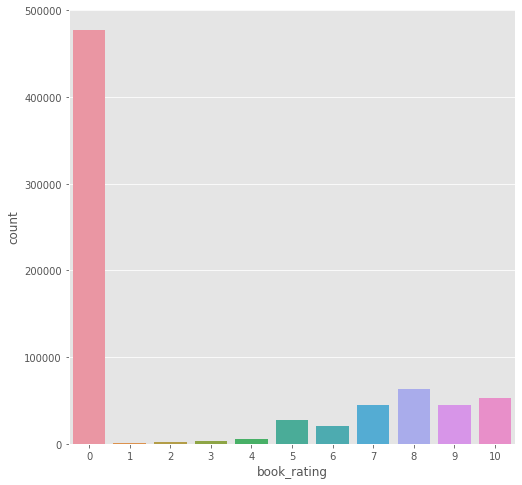

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,8)
sns.countplot(data=bru_noNull , x='book_rating')
plt.show()

This is because of the included implicit ratings that are recorded because of the access but no rating. 

#### considering only explicit ratings for more useful insights and the distribution of ratings

In [ ]:
#separating implicit and explicit ratings
explicit_ratings = bru_noNull[bru_noNull.book_rating != 0]

print(explicit_ratings.shape)
print(bru_noNull.shape)

(264799, 11)
(742692, 11)


In [ ]:
sparsity = 1.0 - len(explicit_ratings)/(explicit_ratings.shape[0])
sparsity

0.0

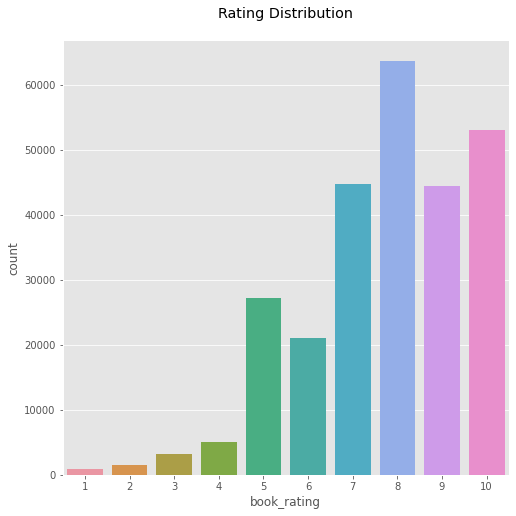

In [ ]:
#rating distribution

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,8)
sns.countplot(data=explicit_ratings , x='book_rating')
plt.title('Rating Distribution\n')
plt.show()

#### number of books rated from each year

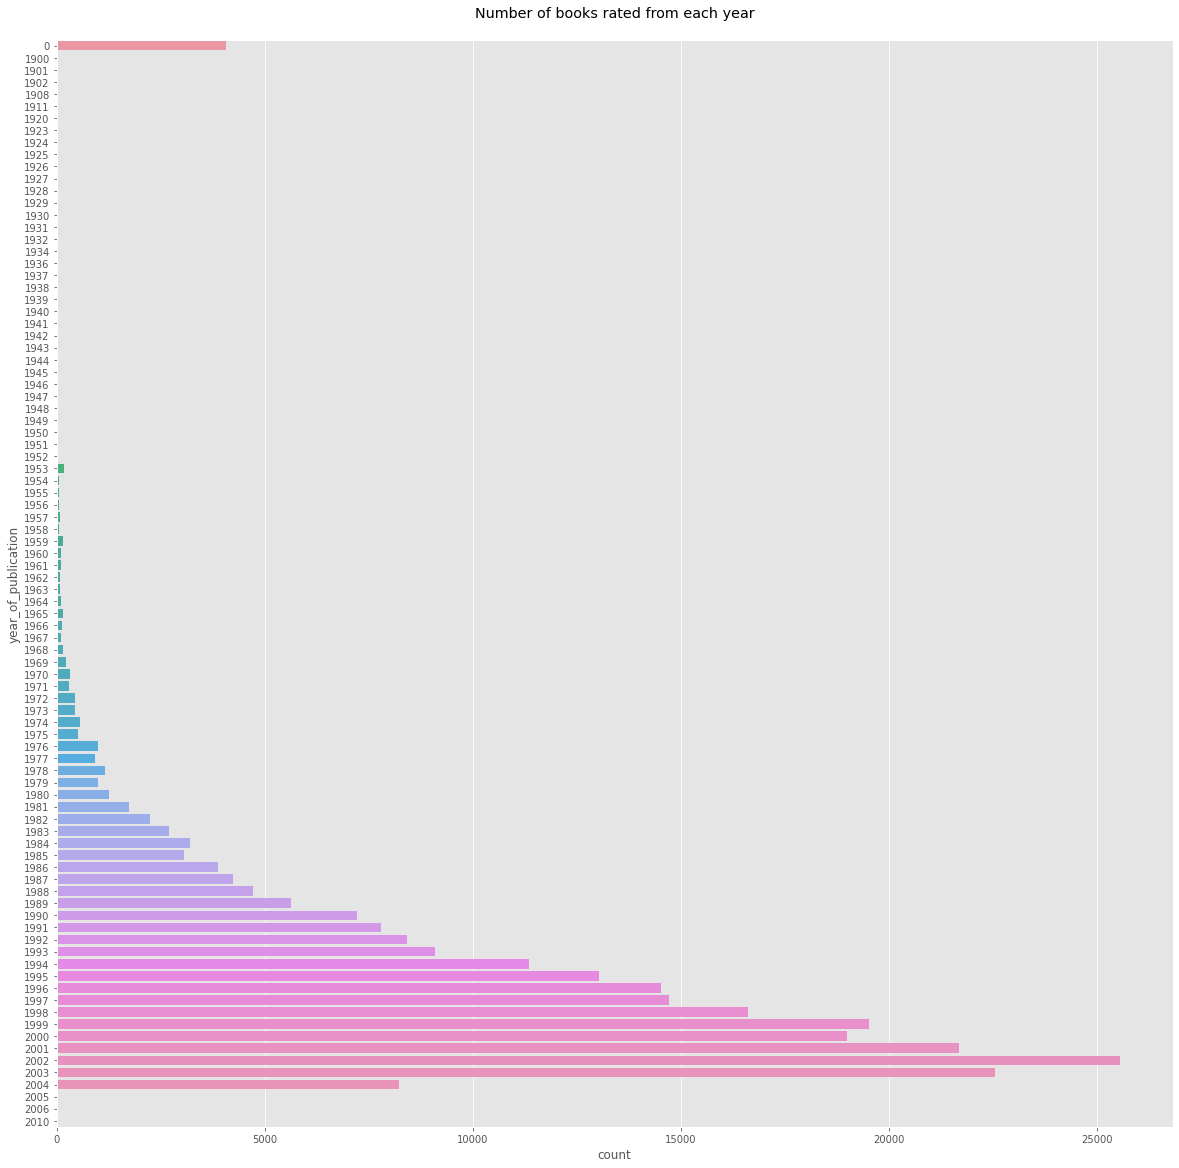

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,20)
sns.countplot(data=explicit_ratings, y ='year_of_publication')
plt.title('Number of books rated from each year\n')
plt.show()

#this shows the dataset has only books published until 2004.

In [ ]:
#we can see here how many unique books are there and the top one
explicit_ratings.book_title.describe()

count          264799
unique         108157
top       Wild Animus
freq              470
Name: book_title, dtype: object

#### Users who contributed more number of ratings are in which age group?

---



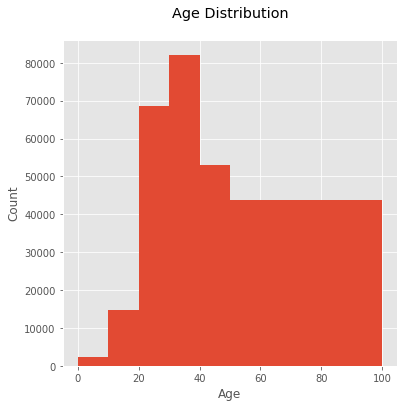

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6,6)

explicit_ratings.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.savefig('system2.png', bbox_inches='tight')
plt.show()

#looks like users who contributed more number of ratings 
#are in between 30 - 40 and 2nd 20 - 30

#### Authors

In [ ]:
explicit_ratings.book_author.describe()

count           264799
unique           50495
top       Stephen King
freq              3432
Name: book_author, dtype: object

There are 50495 unique authors. Where Stephen king is the popular author according to the number of readers. 

In [ ]:
#since there are 50495 unique values, let us only plot the top 10 popular authors
author_count = explicit_ratings.book_author.value_counts().reset_index()
cols = ['book_author', 'num_ratings']
author_count.columns = cols
author_count.head()

,book_author,num_ratings
0,Stephen King,3432
1,Nora Roberts,2086
2,John Grisham,1640
3,James Patterson,1521
4,J. K. Rowling,1348


In [ ]:
author_avg_rating = pd.DataFrame(explicit_ratings.groupby('book_author')['book_rating'].mean()).reset_index()
cols = ['book_author', 'avg_rating']
author_avg_rating.columns = cols
author_avg_rating.head()


,book_author,avg_rating
0,D. Chiel,10.0
1,Mimma Balia,8.0
2,142 moms from all over the world,5.0
3,73 Magazine Editors,6.0
4,";Katie Stewart""",9.0


In [ ]:
popular_author_rating = pd.merge(author_count, author_avg_rating, on = 'book_author' )


top_author_rating = popular_author_rating.sort_values(by = 'num_ratings', ascending=False).head(5)
top_author_rating

,book_author,num_ratings,avg_rating
0,Stephen King,3432,8.018648
1,Nora Roberts,2086,7.704698
2,John Grisham,1640,7.650000
3,James Patterson,1521,7.829060
4,J. K. Rowling,1348,9.037834


In [ ]:
print(popular_author_rating.num_ratings.describe())
print('\n')
popular_author = popular_author_rating.sort_values(by = 'avg_rating', ascending = False).head()
popular_author

count    50495.000000
mean         5.244064
std         32.707812
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3432.000000
Name: num_ratings, dtype: float64




,book_author,num_ratings,avg_rating
21839,Deborah Nourse Lattimore,1,10.0
30773,Bonnie Burstow,1,10.0
26243,Cathy Johnson,1,10.0
38976,GiGi Gossett,1,10.0
46085,Geoffrey Zubay,1,10.0


Again, The authors with top ratings have less number of ratings. The average of the number of ratings each author received is only ~5. 

#### Publishers

In [ ]:
#publishers

explicit_ratings.publisher.describe()

count               264799
unique                9676
top       Ballantine Books
freq                  8346
Name: publisher, dtype: object

In [ ]:
top_publishers = explicit_ratings.publisher.value_counts().reset_index()

cols = ['publisher', 'num_books_published']
top_publishers.columns = cols

top_publishers.head()


,publisher,num_books_published
0,Ballantine Books,8346
1,Pocket,7163
2,Berkley Publishing Group,6088
3,Warner Books,5808
4,Bantam,5129


There is a lot of scope for exploring other aspects in the dataset, however I limited it since my main goal with this dataset is recommendations.

### Recommender Systems:

#### Top 10 books - popularity based


##### Popularity-based recommender system considering the number of ratings of the books.

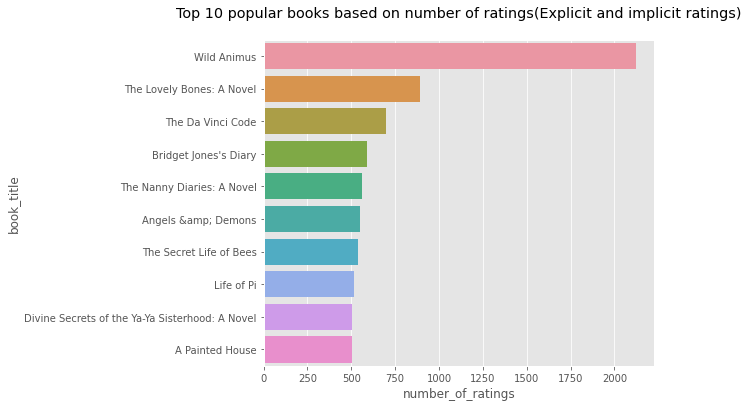

In [ ]:
# count number of ratings for each book to reveal popular books
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7,6)

#total value counts for each book title
book_count = bru_noNull['book_title'].value_counts().reset_index()
#print(book_count)

cols = ['book_title', 'number_of_ratings']
book_count.columns = cols
#print(book_count)

top_10_books = book_count.head(10)

sns.barplot(x='number_of_ratings',y='book_title',data=top_10_books)
plt.title('Top 10 popular books based on number of ratings(Explicit and implicit ratings)\n')
plt.show()

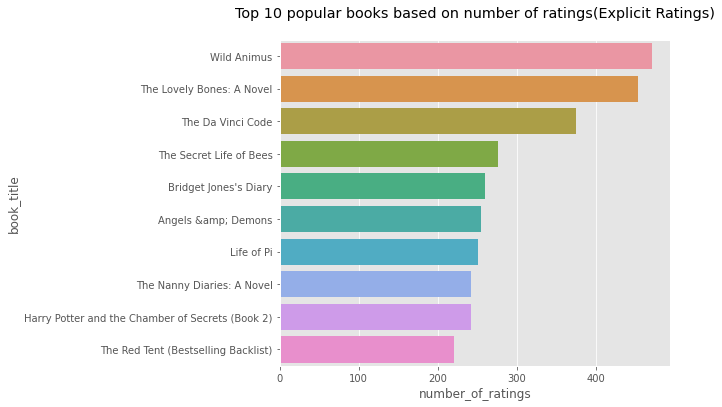

In [ ]:
#based on explicit ratings - most popular books or the books with highest no. of ratings

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7,6)

#total value counts for each book title
book_count = explicit_ratings['book_title'].value_counts().reset_index()
cols = ['book_title', 'number_of_ratings']
book_count.columns = cols
#print(book_count)
top_10_books = book_count.head(10)


sns.barplot(x='number_of_ratings',y='book_title',data=top_10_books)
plt.title('Top 10 popular books based on number of ratings(Explicit Ratings)\n')
plt.show()

# we see that some books varied.

In [ ]:
#explicit_ratings.info()

In [ ]:
#Popular books based on average rating of books

average_rating = pd.DataFrame(explicit_ratings.groupby('book_title')['book_rating'].mean()).reset_index()
cols = ['book_title', 'avg_rating']
average_rating.columns = cols
average_rating.sort_values('avg_rating', ascending = False).head(10)


,book_title,avg_rating
64169,Preventive Defense: A New Security Strategy fo...,10.0
91069,The Power of Crying Out: When Prayer Becomes M...,10.0
91071,The Power of Faith,10.0
66703,Resuelve El Misterio: El Misterio De LA Casa E...,10.0
14570,Cathy Twentieth Anniversary Collection,10.0
34750,Great American Brand Name Recipe Cookbook,10.0
14568,"Catholics: An Unauthorized, Unapproved, Illust...",10.0
34751,Great American Cakes,10.0
34752,Great American Favorite Brand Name Cookbook,10.0
34754,Great American Ghost Stories,10.0


This might not be accurate as there could be books with less number of ratings, but highest average rating.

Hence, having a cut-off value for the minimum number of ratings-count a book needs to have would be helpful. Let us add ratings_count as well to the above dataframe to do this.

In [ ]:
#print(average_rating)
#print(book_count)

In [ ]:
average_rating = pd.merge(book_count, average_rating, on = 'book_title')
top_5 = average_rating.sort_values('number_of_ratings', ascending = False).head()
print(top_5)

                  book_title  number_of_ratings  avg_rating
0                Wild Animus                470    4.476596
1  The Lovely Bones: A Novel                453    8.236203
2          The Da Vinci Code                374    8.427807
3    The Secret Life of Bees                276    8.485507
4      Bridget Jones's Diary                259    7.795367


This shows that the most popular books do not have the highest avg_ratings

In [ ]:
top_5_avg_rating = average_rating.sort_values('avg_rating', ascending = False).head()
top_5_avg_rating

,book_title,number_of_ratings,avg_rating
43814,No Stone Unturned: The True Story of the World...,1,10.0
91176,"Jesus Special Friends (Frank, Penny. Lion Stor...",1,10.0
96284,A Deadly Exchange,1,10.0
96285,Accidental Empires,1,10.0
75770,Crafts for the disabled,1,10.0


We can see that the books with highest ratings are actually the ones that have least number of user ratings. 

In [ ]:
average_rating['number_of_ratings'].describe()

count    108157.000000
mean          2.448284
std           6.804082
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         470.000000
Name: number_of_ratings, dtype: float64

Let us set the cutoff value of number of ratings to 50. By changing into 100, the sample dataset is becoming very small(only 87 observations). Hence 50 cutoff. 

In [ ]:
average_rating = average_rating[average_rating['number_of_ratings'] > 50]
print(average_rating)
average_rating['number_of_ratings'].describe()

                                            book_title  ...  avg_rating
0                                          Wild Animus  ...    4.476596
1                            The Lovely Bones: A Novel  ...    8.236203
2                                    The Da Vinci Code  ...    8.427807
3                              The Secret Life of Bees  ...    8.485507
4                                Bridget Jones's Diary  ...    7.795367
..                                                 ...  ...         ...
332              Anne Frank: The Diary of a Young Girl  ...    8.764706
333                                               Cujo  ...    7.568627
334                       Nightmares &amp; Dreamscapes  ...    7.960784
335  The Clan of the Cave Bear (Earth's Children (P...  ...    8.411765
336            Midnight in the Garden of Good and Evil  ...    7.509804

[337 rows x 3 columns]


count    337.000000
mean      91.593472
std       53.564195
min       51.000000
25%       60.000000
50%       74.000000
75%      102.000000
max      470.000000
Name: number_of_ratings, dtype: float64

##### Popularity-based recommender system considering average ratings of the books.

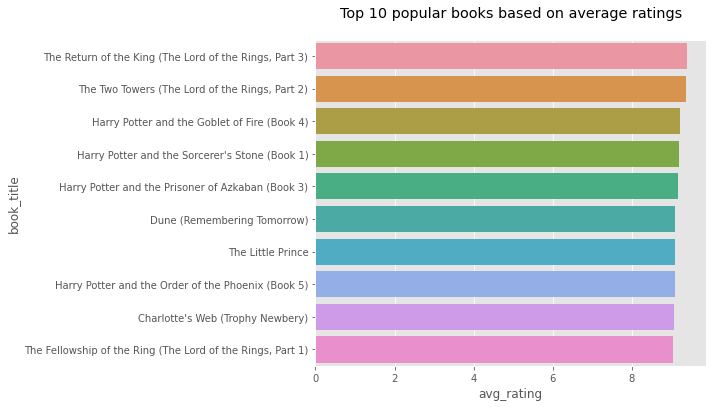

In [ ]:
top_10_popular = average_rating.sort_values('avg_rating', ascending= False).head(10)
top_10_popular
#top_10_popular = pd.merge(average_rating, explicit_ratings, on = 'book_title')

sns.barplot(x='avg_rating',y='book_title',data=top_10_popular)
plt.title('Top 10 popular books based on average ratings\n')
plt.show()

##### Simple age based popular book recommendation

Steps: 

- take avg age group
- take top 10 by filtering  
- merge by finding mean age
- given x and y, find popular books for that age group


In [ ]:
average_age = pd.DataFrame(explicit_ratings.groupby('book_title')['age'].mean().round(2)).reset_index()
cols = ['book_title', 'age_mean']
average_age.columns = cols
average_age = pd.merge(average_rating, average_age, on = 'book_title')
#print(average_age)
#print(average_age.age_mean.describe())

def age_recommend(x, y):  
  between_age = average_age[average_age['age_mean'].between(x, y)]
  between_age
  top_5_age_based = between_age.sort_values('avg_rating', ascending = False).head()
  return(top_5_age_based)

#choose between 22 to 45 - min, max of the age_mean column after filtering
age_recommend(30, 35)


,book_title,number_of_ratings,avg_rating,age_mean
79,"The Two Towers (The Lord of the Rings, Part 2)",108,9.370370,30.42
45,Harry Potter and the Sorcerer's Stone (Book 1),139,9.179856,31.57
11,Harry Potter and the Prisoner of Azkaban (Book 3),212,9.160377,31.06
319,Dune (Remembering Tomorrow),52,9.096154,34.19
219,The Little Prince,64,9.093750,31.58


#### Memory based Collaborative filtering(Content based recommender)

* Unsupervised classifier
* memorizes instances and then recommends an item based on how similar it is to the incoming instance

##### K - Nearest Neighbors method

In [ ]:
new_books_ratings = pd.merge(ratings, books, on = 'isbn')
new_books_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [ ]:
cols = ['year_of_publication', 'publisher', 'book_author']
new_books_ratings = new_books_ratings.drop(cols, axis = 1)
new_books_ratings = new_books_ratings.dropna(axis=0, subset = ['book_title'])

In [ ]:
books_ratings_count = (new_books_ratings.
     groupby(by = ['book_title'])['book_rating'].
     count().
     reset_index().
     rename(columns = {'book_rating': 'total_rating_count'})
     [['book_title', 'total_rating_count']]
    )
books_ratings_count.head()

,book_title,total_rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
books_ratings_RatingCount = new_books_ratings.merge(books_ratings_count, left_on = 'book_title', right_on = 'book_title', how = 'left')
books_ratings_RatingCount.head()

,user_id,isbn,book_rating,book_title,total_rating_count
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
books_ratings_RatingCount.shape

(1031175, 5)

In [ ]:
cutoff = 50
books_ratings_cutoff = books_ratings_RatingCount.query('total_rating_count >= @cutoff')
books_ratings_cutoff.head()


,user_id,isbn,book_rating,book_title,total_rating_count
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
books_ratings_cutoff.shape

(288740, 5)

In [ ]:
new_books_ratings_users = books_ratings_cutoff.merge(users, left_on = 'user_id', right_on = 'user_id', how = 'left')
new_books_ratings_users.head()

,user_id,isbn,book_rating,book_title,total_rating_count,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa",23
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa",34
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa",2
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa",NaN


In [ ]:
new_books_ratings_users.drop('age', axis=1)

,user_id,isbn,book_rating,book_title,total_rating_count,location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"
...,...,...,...,...,...,...
288735,274061,1551663147,10,Fever,68,"gahanna/columbus, ohio, usa"
288736,274808,0449701913,0,Homecoming,137,"paynesville, , usa"
288737,275970,0865714215,0,Stormy Weather,103,"pittsburgh, pennsylvania, usa"
288738,275970,1586210661,9,Me Talk Pretty One Day,457,"pittsburgh, pennsylvania, usa"


In [ ]:
new_books_ratings_users = new_books_ratings_users.drop_duplicates(['user_id', 'book_title'])

In [ ]:
new_crosstab = new_books_ratings_users.pivot(index = 'book_title', columns = 'user_id', values = 'book_rating').fillna(0)


In [ ]:
crosstab_matrix = csr_matrix(new_crosstab.values, dtype=int)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(crosstab_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(new_crosstab.shape[0])
distances, indices = model_knn.kneighbors(new_crosstab.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_crosstab.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_crosstab.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Pandora : New Tales of the Vampires:

1: Memnoch the Devil : The Vampire Chronicles (Vampire Chronicles), with distance of 0.8042361255539059:
2: Merrick (Vampire Chronicles), with distance of 0.8109956498517386:
3: Violin, with distance of 0.8195257330918941:
4: Memnoch the Devil (Vampire Chronicles, No 5), with distance of 0.8207685794770847:
5: The Tale of the Body Thief (Vampire Chronicles), with distance of 0.8361609746662676:


#### Model based Collaborative filtering

We build a model and then make recommendations based on that model

##### SVD (Singular Value Decomposition) matrix method.

- Determines the relationship between the users and items and then recommends

Reference: https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/


In [ ]:
crosstab_2 = new_books_ratings_users.pivot(index = 'user_id', columns = 'book_title', values = 'book_rating').fillna(0)
print(crosstab_2.shape)
crosstab_2.head()
Transposed = crosstab_2.values.T
print(Transposed.shape)
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(Transposed)
matrix.shape

(47994, 2444)
(2444, 47994)


(2444, 12)

In [ ]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

In [ ]:
new_book_title = crosstab_2.columns
new_book_list = list(new_book_title)
Harry_Potter = new_book_list.index("Harry Potter and the Prisoner of Azkaban (Book 3)")
corr_Harry_Potter  = corr[Harry_Potter]
recommended_list = list(new_book_title[(corr_Harry_Potter<1.0) & (corr_Harry_Potter>0.9)])
recommended_list

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

#### Correlation based recommender system

How well it correlates with other items w.r.t user ratings? Correlation based recommender systems are a simple form of collaborative filtering recommender systems.(user-user filtering) 

User - Similarity based filtering 
* Item based similarity - we find out the similarity between the items based on the user ratings

##### Pearson's r correlation

In [ ]:
ratings['book_rating'] = ratings['book_rating'].astype(int)

average_ratings = pd.DataFrame(ratings.groupby('isbn')['book_rating'].mean())
average_ratings['rating_count'] = pd.DataFrame(ratings.groupby('isbn')['book_rating'].count())
average_ratings.sort_values('rating_count', ascending=False).head()

,book_rating,rating_count
isbn,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [ ]:
#taking book-ratings with atleast 100 number of ratings
#and, users who have atleast rated 200 books
users_above100 = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(users_above100[users_above100 >= 200].index)]
ratings_above100 = ratings['book_rating'].value_counts()
ratings = ratings[ratings['book_rating'].isin(ratings_above100[ratings_above100 >= 100].index)]

In [ ]:
crosstab_ratings = ratings.pivot(index='user_id', columns='isbn').book_rating
user_id = crosstab_ratings.index
isbn = crosstab_ratings.columns
print(crosstab_ratings.shape)
crosstab_ratings.head()

(905, 207699)


isbn,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,9061002273,*0515128325,+0451197399,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0*708880258,0.330241664,00000000,000000000,0000000000,00000000000,000000000000,0000000000000,0000000029841,0000000030670,0000000033220,0000000051,0000001042283,0000001481,0000018030,0000722105029,0000913154,0001010565,0001046438,000104687X,0001047213,0001047639,0001047663,...,O425155404,O42516313X,O439060737,O439161673,O446611638,O451203771,O499139921,O590418262,O590477412,O59052528X,O67174142X,O774037474,O77O428452,O786001690,O805063196,O856856428,O861366301,O880015152,O889950962,O9088446X,PS3569E84K5,Q380708353,Q912838027,SBN67001026X,T110105305048,T110105705048,TBR0385495641,THEALLTRUETRA,THECATASTROPH,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pull the isbn of Harry Potter and the Goblet of Fire (Book 4)
HP_isbn = explicit_ratings[explicit_ratings['book_title'] == "Harry Potter and the Goblet of Fire (Book 4)"]
print(HP_isbn.isbn.value_counts())

0439139597    102
0439139600     85
Name: isbn, dtype: int64


In [ ]:
# based on similarities in user reviews. (user-user)
HP_ratings = crosstab_ratings['0439139597']
similar_to_HP = crosstab_ratings.corrwith(HP_ratings)
corr_HP = pd.DataFrame(similar_to_HP, columns=['pearsonR'])
corr_HP.dropna(inplace=True)
corr_summary = corr_HP.join(average_ratings['rating_count'])
corr_summary[corr_summary['rating_count']>=300].sort_values('pearsonR', ascending=False).head(10)
#300 because at least without minimum number of ratings, the results won't be helpful

,pearsonR,rating_count
isbn,,
0345353145,0.742040,368
0375725784,0.718421,302
043935806X,0.707731,334
0060502258,0.664134,376
0671510053,0.577813,349
0060987103,0.565761,326
068484477X,0.557468,341
0375726403,0.550750,321
044023722X,0.542403,647


In [ ]:
books_corr_to_HP = pd.DataFrame(['0345353145', '0375725784', '043935806X', '0060502258', '0671510053', '0060987103', '068484477X', '0375726403', '044023722X', '0375727345'], 
                                  index=np.arange(10), columns=['isbn'])
corr_books = pd.merge(books_corr_to_HP, books, on='isbn')
corr_books

,isbn,book_title,book_author,year_of_publication,publisher
0,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
1,0375725784,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001,Vintage Books USA
2,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
3,0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch
4,0671510053,SHIPPING NEWS,Annie Proulx,1994,Scribner
5,0060987103,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books
6,068484477X,STONES FROM THE RIVER,Ursula Hegi,1997,Touchstone
7,0375726403,Empire Falls,Richard Russo,2002,Vintage Books USA
8,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
9,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books


In [ ]:
books.book_title.describe()

count             271379
unique            242154
top       Selected Poems
freq                  27
Name: book_title, dtype: object

## Project Summary:

**Title** - Book recommender system

**Name** - Sai Hymavathi Majeti

**UIN** - 01063435

#### Introduction

Book Crossing dataset is a collection of books, their users, ratings given to the books by users, age and demographic information of the users. 

* Usually, before we buy a product, read a book or watch a movie, we look at the ratings or the number of users who rated it or bought it, etc. 

* Therefore, ratings play in important role especially these days where we want to get the works done online. 

* Recommender systems makes it easier for a user to decide on something while also implying / showing other related items to what the user is looking for.
 
This project is focused on building recommender systems after the data pre-processing.



#### Observations from the dataset

* There were a lot of null values in the dataset as some details were missing and, as not all books were rated by the user. 
* N/As were changed to 0s as it would make understanding and working with the dataset easier.
* Only the explicit ratings were considered.

#### Observations from the EDA

The following are some observations while looking at the dataset:

* There were books or authors that received the highest rating but only few number of ratings. 
* Similarly, there were books and authors that were popular among the users(highest number of ratings) but few of them received lowest rating.
* I calculated the number of ratings, average rating to know the actual popular book titles/authors.

Here are some plots created while exploring the dataset:


**Rating Distribution** - average rating all the books received is 8.

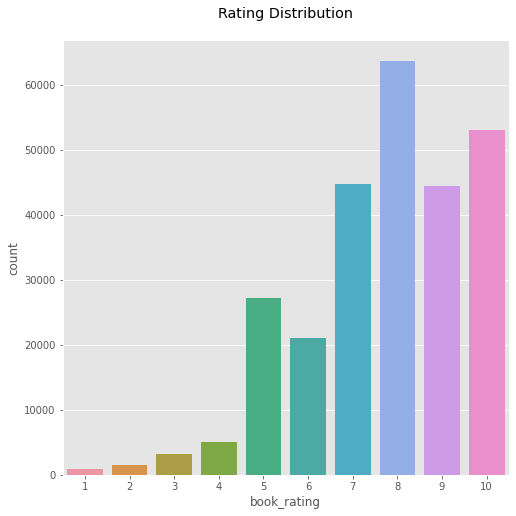

**Number of books rated from each year** - 2002 being the highest year - of - publication. 



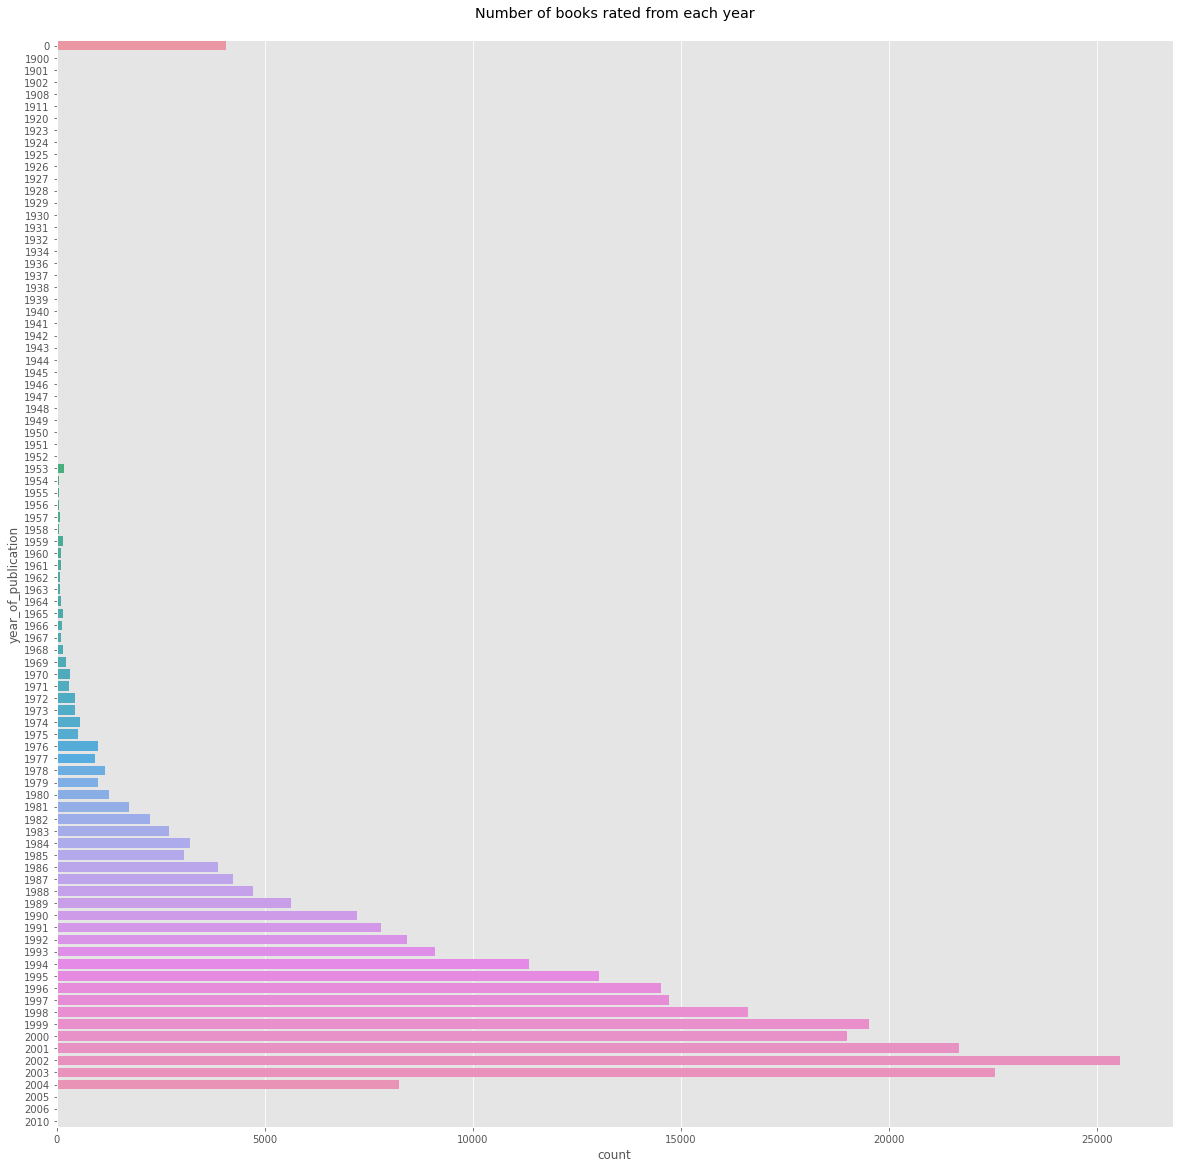

**Users from which age group were more active?** 


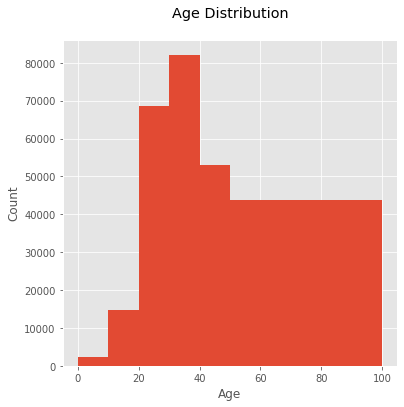

**Popular publishers**

In [ ]:
top_publishers.head()


,publisher,num_books_published
0,Ballantine Books,8346
1,Pocket,7163
2,Berkley Publishing Group,6088
3,Warner Books,5808
4,Bantam,5129


**Popular / highest rated authors**

In [ ]:
top_author_rating

,book_author,num_ratings,avg_rating
0,Stephen King,3432,8.018648
1,Nora Roberts,2086,7.704698
2,John Grisham,1640,7.650000
3,James Patterson,1521,7.829060
4,J. K. Rowling,1348,9.037834


#### Results and Evaluations

**Recommender Systems**

Popularity based book recommender - based on num of ratings.

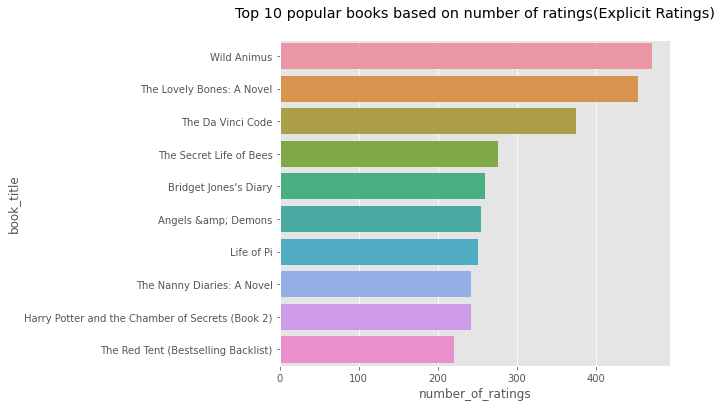

Popularity based book recommender - based on average rating

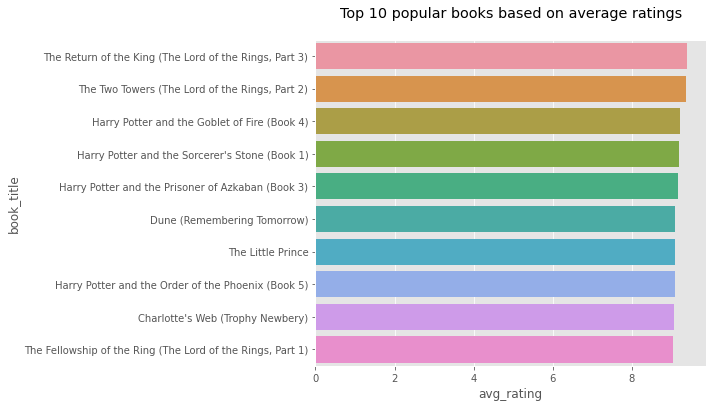

Book recommendation for the age group

In [ ]:
#choose between 22 to 45 - min, max of the age_mean column after filtering
age_recommend(25, 35)

,book_title,number_of_ratings,avg_rating,age_mean
131,"The Return of the King (The Lord of the Rings,...",82,9.402439,29.68
79,"The Two Towers (The Lord of the Rings, Part 2)",108,9.370370,30.42
18,Harry Potter and the Goblet of Fire (Book 4),187,9.213904,29.34
45,Harry Potter and the Sorcerer's Stone (Book 1),139,9.179856,31.57
11,Harry Potter and the Prisoner of Azkaban (Book 3),212,9.160377,31.06


**Collaborative Filtering - Memory based recommender**

KNN - Model

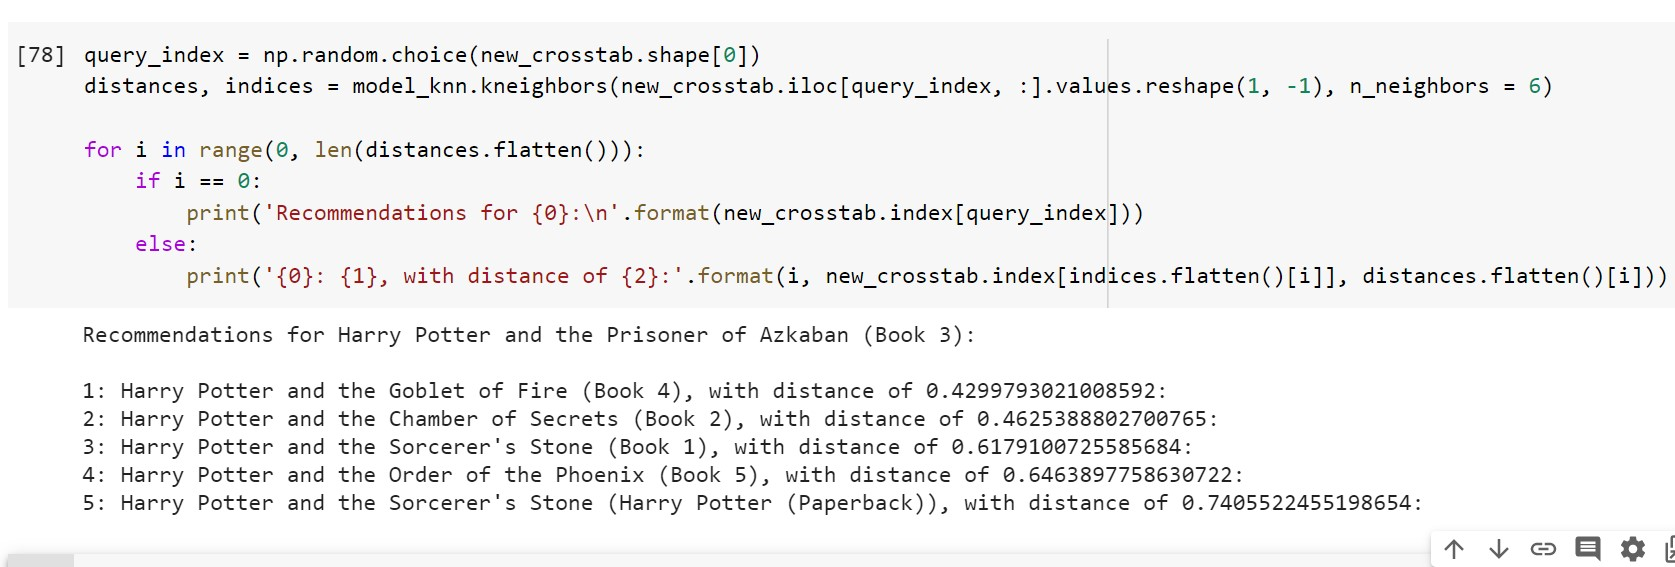

In [ ]:
Image("/content/drive/MyDrive/Pic2.jpg", width=1000)

**Model based recommender**

SVD - method

In [ ]:
recommended_list 
#(This is the recommended list for the book Harry Potter and the Prisoner of Azkaban(Book 3))

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

**Correlation based recommending - user similarity**

Pearson - r correlations

In [ ]:
corr_books 
#(The following are also the recommendations for the book - Harry Potter and the Prisoner of Azkaban )

,isbn,book_title,book_author,year_of_publication,publisher
0,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
1,0375725784,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001,Vintage Books USA
2,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
3,0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch
4,0671510053,SHIPPING NEWS,Annie Proulx,1994,Scribner
5,0060987103,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books
6,068484477X,STONES FROM THE RIVER,Ursula Hegi,1997,Touchstone
7,0375726403,Empire Falls,Richard Russo,2002,Vintage Books USA
8,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
9,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books


**Evaluation**

* First observation is that, if we give Harry Potter as input we are getting the books in that series itself as the recommended books. Which is a pretty good measure for the effectiveness of our Recommender system.

* For other methods, we can clearly see that the books that are being recommended have at least 1 commonality between them.
 - Say, for Pearson - r correlation, all the recommneded books have atleast 1 common point which is wether they are fictional - magic related or the main character loses his/her parents.  
 - KNN and SVD methods gave the best results amongst all.

  Therefore, based on these, I did not use any other evaluation methods available. However, I am pipelining this for the future work that could be done with this dataset.

* And, for popularity based recommender systems - they are based on the rating count (or) the overall-rating received - hence, I did not use any evaluation methods for these. 

#### Conclusion

* With the book - ratings, dataset - popular books w.r.t various factors has been determined. 

* Book recommendations were provided using 4 methods - popularity based, age based, collaborative filtering based(KNN and SVD), Correlation based(pearson r)

* **Uses/Applications**
 - It makes the task of the reader easier
 - A reader would be able to pick the book of his/her choice based on the criteria he is looking for.
 - More personalised recommendations for the readers which increases the reading habit of the user which in turn increases the use of the app/webpage if recommndation system is embedded



#### Future Work

There are vast number of things that could be done with a simple book dataset which has user ratings. Following are few more areas where I find scope for the future work with this dataset.

* Exploring more ways to recommend books and see how the results are

* Develop more sophisticated method for book recommendations based on the given age group criteria

* Explore if I could find a way to attach the genres to this dataset and provide recommendations based on that

* Observe the user behaviour and predict which book he is going to read next - that way even more personalised recommendations could be made.

* Lastly, there is still more cleaning of the data that could be done. 

#### Video - Project Presentation/demo

[Here is the link to my project presentation youtube video! ](https://youtu.be/Wt1HGh1gMuI)

(Thanks for watching! :))

### References:
1. [Data Cleaning - towardsdatascience.com](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
2. [Pandas - Dataframe documentation](https://pandas.pydata.org/docs/reference/frame.html)
3. [Linkedin Course on  ***building recommendation systems with python-machine-learning-ai***](https://www.linkedin.com/learning/building-a-recommendation-system-with-python-machine-learning-ai/welcome?u=57692025)
4. [Scikit - Nearest neighbors documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors_)
5. Tutorials on building recommender systems:
  * [Music recommender system](https://beckernick.github.io/music_recommender/) 
  * [CodeProject.com](https://www.codeproject.com/articles/1251123/)
  * [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/)
  * [KD Nuggets](https://www.kdnuggets.com/2020/07/building-content-based-book-recommendation-engine.html)


